<center><h1><font style="color:red;">ASSIGNMENT </font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Using inbuilt dataset of Breast cancer from scikit learn Implement PCA 
algorithm
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1.To learn about dimensionality reduction techniques<br>
2.To implement principle component analysis
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

#### Dimensionality reduction :
Its is reducing the dimensionality of a dataset.dimensionality is the number of dimensions, features or input variables associated in a dataset
#### Main approaches to dimensionality reduction
There are two main approaches to dimensionality reduction:
* Linear methods
* Non-linear methods (Manifold learning)

#### PCA
* Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
* High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.
* The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. 
* Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.
* PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.
PCA is an unsupervised learning algorithm as the directions of these components is calculated purely from the explanatory feature set without any reference to response variables.

The number of feature combinations is equal to the number of dimensions of the dataset and in general set the maximum number of PCAs which can be constructed.<br>
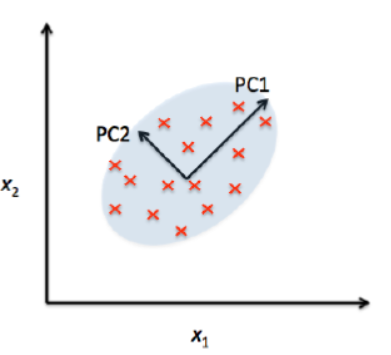<br>
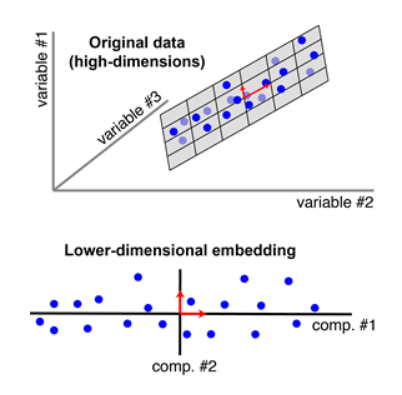<br>
Each blue point corresponds to an observation, and each principal component reduces the three dimensions to two. The algorithm finds a pair of orthogonal vectors (red arrows) that define a lower-dimensional space (grey plane) to capture as much variance as possible from the original dataset.

#### Measurement
Eigenvectors and eigenvalues are measures used to quantify the direction and the magnitude of the variation captured by each axis. Eigenvector describes the angle or direction of the axis through the data space, and the eigenvalue quantifies the magnitude of the variance of the data on the axis.<br>
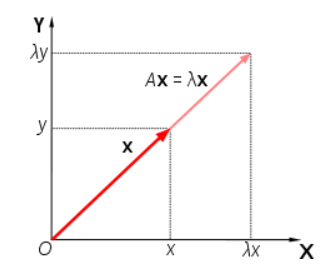<br>
A is an x n matrix, ƛ is the eigenvalue, and the X is the eigenvector.

The number of feature combinations is equal to the number of dimensions of the dataset. For example, a dataset with ten features will have ten eigenvalues/eigenvector combinations.

The correlation between each principal component should be zero as subsequent components capture the remaining variance. Correlation between any pair of eigenvalue/eigenvector is zero so that the axes are orthogonal, i.e., perpendicular to each other in the data space.

The line which maximizes the variance of the data once it is projected into the data space is equivalent to finding the path which minimizes the least-squares distance of the projection.<br>
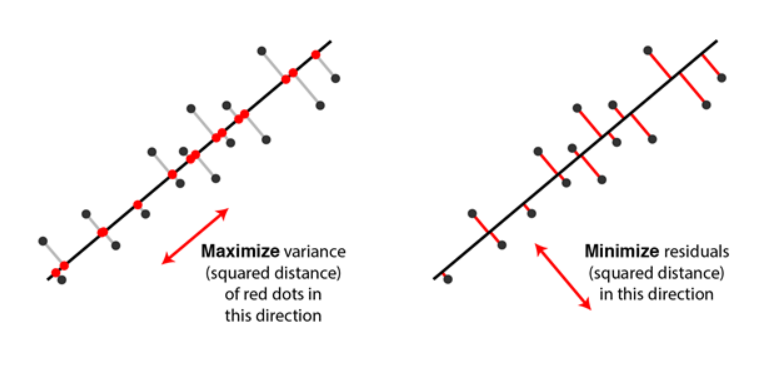<br>


### Dataset used and its attributes

<b>DataSet Link : </b> https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)<br>
<b>Dataset Information :</b>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


<b>Features Explanations:</b>
* Number of Instances: 569
* Number of Attributes: 30 numeric, predictive attributes and the class
#### Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each data, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 
* Missing Values: 569 
* Class Distribution: 
    * 212 - Malignant, 
    * 357 - Benign
Depending on the types of cells in a tumor, it can be:
* Benign - The tumor doesn’t contain cancerous cells.
* Malignant - The tumor contains cancerous cells.

<br>


### Import All Necessary Library

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

### Load the DataSet

In [ ]:
df = pd.read_csv("Breast Cancer Data.csv")

In [ ]:
df.head()

### View First 5 Rows

In [ ]:
df.head()

### Set Option to View all Rows and Columns

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dimensions of the Dataset

In [ ]:
df.shape

Dataset contains 569 instances with 33 rows

### Concise Summary

In [ ]:
df.info()

From above result diagnosis is the feature in object datatype and  Unnamed: 32 feature contains all now value 
lets check by using pandas function

### Check the Missing Data

In [ ]:
df.isnull().sum()

From the above observation Unnamed: 32 column contains all the Null values<br>
So it would be better to drop the column

#### Drop the Column Containing Missing Value

In [ ]:
df.drop('Unnamed: 32',axis = 1,inplace = True)

#### Recheck the Missing Value is present or not

In [ ]:
df.isnull().sum().sum()

### Statistical Summary of data

In [ ]:
df.describe()

### Columns of the dataset

In [ ]:
df.columns

### Check The types of values of Diagnosis Present In dataset

In [ ]:
df.diagnosis.unique()

### Count number of Malignant (M) or Benign (B) Cells

In [ ]:
df['diagnosis'].value_counts()

From above result we can say that M=Maligant is of 212 instance which is postive prediction <br> B= Benign is of 357 instance which is negative prediction

In [ ]:
sns.countplot('diagnosis',data=df,label ="Diagnosis")


Dataset Contain Maximum Number of Negative Predictions 

### Correlation Between Data

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Heatmap of Correlation matrix ",fontsize=15)
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

## Data Preprocessing -
### Feature elemination

In [ ]:
# feature is not for our use as it consist of id of the patient
df.drop('id',axis=1,inplace= True) 

In [ ]:
df.isnull().sum().sum()

### Feature encoding 
#### Converting Categorical features into numberic features

In [ ]:
le = preprocessing.LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df['diagnosis'].unique()

In [ ]:
df.head()

#### Now our data is ready to pass the model and perform ML building.

In [ ]:
cancer_pos_rate = np.sum(df.diagnosis) / len(df.diagnosis) *100
print('Breast Cancer +ve rate - ',cancer_pos_rate)

##### The given dataset contains only 3.7 % of cancer +ve data which is balance data for building accurate model.

## Spliting Dataset for Feature Selection of Model Building

#### The process dataset contain 569 instance ,31 columns including target variable and zero null values

In [ ]:
X =df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [ ]:
scalar = preprocessing.StandardScaler()

In [ ]:
col = X.columns

In [ ]:
X =  scalar.fit_transform(X)

In [ ]:
X = pd.DataFrame(X,columns=col)
X.head()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
lr = LogisticRegression().fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

In [ ]:
pca = PCA(n_components = 0.85)
# perform PCA on the scaled data
pca.fit(X)

In [ ]:
print("Eigenvalues:")
print(pca.explained_variance_)
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

In [ ]:
transformed_df = pd.DataFrame(pca.transform(X), 
                              columns=['PC1', 'PC2', 'PC3', 
                                       'PC4', 'PC5','PC6'])

In [ ]:
transformed_df.head()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(transformed_df,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
lr1 = LogisticRegression().fit(X_train,y_train)
print(lr1.score(X_train,y_train))
print(lr1.score(X_test,y_test))

### Conclusion

### Thus we have successfully studied and Implemented PCA on Breast Cancer Dataset